In [2]:
import copy
import matplotlib.pyplot as plt
import autograd.numpy as np
from sklearn import datasets, preprocessing

from pymanopt.solvers import TrustRegions
from manopt_dr.core import gen_ldr
from manopt_dr.predefined_func_generator import *

In [3]:
# Generate data
dataset = datasets.load_wine()
X = dataset.data
y = dataset.target
print(X[0])
print(y)
print(type(X))
n_samples, n_features = X.shape
n_components = 2
X = preprocessing.scale(X)



[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
<class 'numpy.ndarray'>


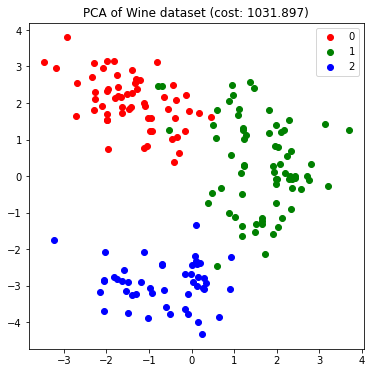

In [3]:
# PCA
PCA = gen_ldr(gen_cost_pca, gen_default_proj)
pca = PCA(n_components=n_components)
Z = pca.fit_transform(X)
cost = pca.get_final_cost()

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(Z[y == 0, 0], Z[y == 0, 1], c='r', label=0)
plt.scatter(Z[y == 1, 0], Z[y == 1, 1], c='g', label=1)
plt.scatter(Z[y == 2, 0], Z[y == 2, 1], c='b', label=2)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title(f'PCA of Wine dataset (cost: {cost:.3f})')
plt.show()



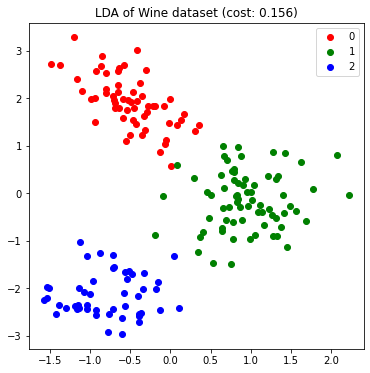

In [4]:
# LDA
LDA = gen_ldr(gen_cost_lda, gen_default_proj)
lda = LDA(n_components=n_components)
Z = lda.fit_transform(X, y)
cost = lda.get_final_cost()

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(Z[y == 0, 0], Z[y == 0, 1], c='r', label=0)
plt.scatter(Z[y == 1, 0], Z[y == 1, 1], c='g', label=1)
plt.scatter(Z[y == 2, 0], Z[y == 2, 1], c='b', label=2)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title(f'LDA of Wine dataset (cost: {cost:.3f})')
plt.show()



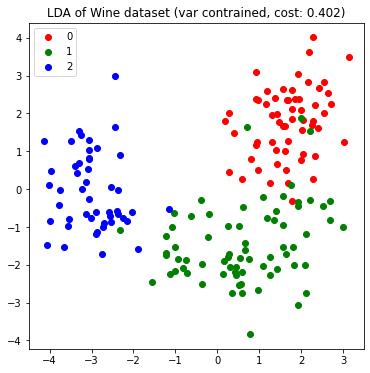

In [5]:
# Constrained LDA
LDA_c = gen_ldr(gen_cost_lda_constrain,
                gen_default_proj,
                solver=TrustRegions(maxtime=float('inf')))
lda_c = LDA_c(n_components=n_components)
Z = lda_c.fit_transform(X, y, 0.6)
cost = lda_c.get_final_cost()

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(Z[y == 0, 0], Z[y == 0, 1], c='r', label=0)
plt.scatter(Z[y == 1, 0], Z[y == 1, 1], c='g', label=1)
plt.scatter(Z[y == 2, 0], Z[y == 2, 1], c='b', label=2)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title(f'LDA of Wine dataset (var contrained, cost: {cost:.3f})')
plt.show()



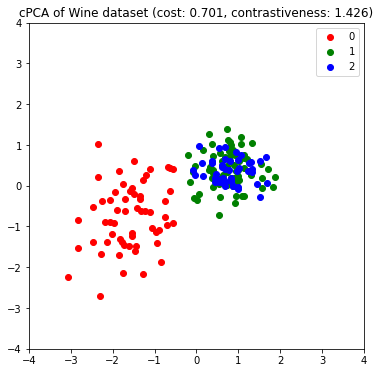

In [6]:
# cPCA
y_tg = y == 0
y_bg = y != 0
X_tg = X[y_tg, :]
X_bg = X[y_bg, :]

CPCA = gen_ldr(gen_cost_cpca, gen_default_proj)
cpca = CPCA(n_components=n_components).fit(X_tg, X_bg)
Z = cpca.transform(X)
cost = cpca.get_final_cost()
contrastiveness = 1 / cost

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(Z[y == 0, 0], Z[y == 0, 1], c='r', label=0)
plt.scatter(Z[y == 1, 0], Z[y == 1, 1], c='g', label=1)
plt.scatter(Z[y == 2, 0], Z[y == 2, 1], c='b', label=2)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.title(
    f'cPCA of Wine dataset (cost: {cost:.3f}, contrastiveness: {contrastiveness:.3f})'
)
plt.show()



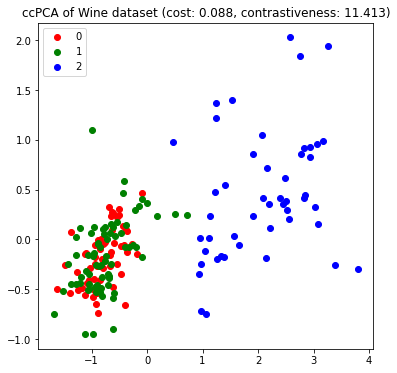

In [7]:
# ccPCA
X_tg = X[y == 2, :]
X_bg = X[y != 2, :]
CCPCA = gen_ldr(gen_cost_ccpca, gen_default_proj)
ccpca = CCPCA(n_components=n_components).fit(X_tg, X_bg)
Z = ccpca.transform(X)
cost = ccpca.get_final_cost()
contrastiveness = 1 / cost

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(Z[y == 0, 0], Z[y == 0, 1], c='r', label=0)
plt.scatter(Z[y == 1, 0], Z[y == 1, 1], c='g', label=1)
plt.scatter(Z[y == 2, 0], Z[y == 2, 1], c='b', label=2)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title(
    f'ccPCA of Wine dataset (cost: {cost:.3f}, contrastiveness: {contrastiveness:.3f})'
)
plt.show()



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2]
<class 'numpy.ndarray'>
[[-8.49272340e-01  6.73416763e-01]
 [-9.60023753e-01  4.44158227e-01]
 

NameError: name 'cost' is not defined

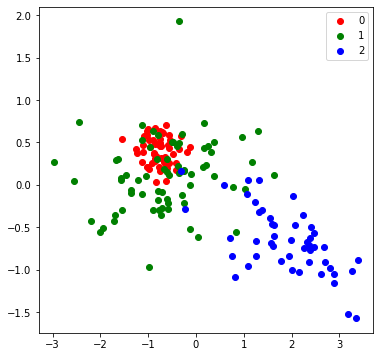

In [8]:
# generalized cPCA
GCPCA = gen_ldr(gen_cost_gcpca, gen_default_proj)
y_tg = copy.deepcopy(y)

y_tg[y_tg == 0] = -1
print(y)
print(y_tg)
print(type(y))
y_bg = copy.deepcopy(y)
y_bg[y_bg == 1] = -1
y_bg[y_bg == 2] = -1
gcpca = GCPCA(n_components=n_components).fit(X, y_tg, y_bg)
Z = gcpca.transform(X)
#cost = ccpca.get_final_cost()
#contrastiveness = 1 / cost

#print(Z)
# Plot
plt.figure(figsize=(6, 6))
print(Z)
print(type(Z))
plt.scatter(Z[y == 0, 0], Z[y == 0, 1], c='r', label=0)
plt.scatter(Z[y == 1, 0], Z[y == 1, 1], c='g', label=1)
plt.scatter(Z[y == 2, 0], Z[y == 2, 1], c='b', label=2)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title(
    f'Generalized cPCA of Wine dataset (cost: {cost:.3f}, contrastiveness: {contrastiveness:.3f})',
    fontsize=8)
plt.show()